# Getting started

Once you've chosen your scenario, download the data from [the Iowa website](https://data.iowa.gov/Economy/Iowa-Liquor-Sales/m3tr-qhgy) in csv format. Start by loading the data with pandas. You may need to parse the date columns appropriately.

In [26]:
import pandas as pd
import numpy as np
%matplotlib inline

## Load the data into a DataFrame
df = pd.read_csv('Iowa_Liquor_sales_sample_10pct.csv')

In [27]:
## Transform the dates if needed, e.g.
#df["Date"] = pd.to_datetime(df["Date"], format="%m/%d/%y")
#df["Date"].groupby(pd.TimeGrouper("12M"))
#df["Date"].astype('datetime')

df['Date'] = pd.to_datetime(df['Date'],infer_datetime_format=True)

# Explore the data

Perform some exploratory statistical analysis and make some plots, such as histograms of transaction totals, bottles sold, etc.

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
df.head(3)

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,2015-11-04,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,$4.50,$6.75,12,$81.00,9.0,2.38
1,2016-03-02,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,$13.75,$20.63,2,$41.26,1.5,0.40
2,2016-02-11,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,$12.59,$18.89,24,$453.36,24.0,6.34


In [30]:
# Strip '$' from columns containing dollar amounts to aid pandas operations on respective columns

df['Sale (Dollars)'] = df['Sale (Dollars)'].apply(lambda x: float(x[1:]))
df['State Bottle Cost'] = df['State Bottle Cost'].apply(lambda x: float(x[1:]))
df['State Bottle Retail'] = df['State Bottle Retail'].apply(lambda x: float(x[1:]))

df.head(3)

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,2015-11-04,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,4.50,6.75,12,81.00,9.0,2.38
1,2016-03-02,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,13.75,20.63,2,41.26,1.5,0.40
2,2016-02-11,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,12.59,18.89,24,453.36,24.0,6.34


In [31]:
# Rename some columns for ease of future operations

df = df.rename(columns={'Date':'date', 'Store Number': 'storenumber', 'Zip Code': 'zipcode', 
                        'City':'city', 'Vendor Number': 'vendornumber', 'County Number': 'countynumber', 
                        'County':'county','Bottle Volume (ml)':'bv_ml', 'State Bottle Cost':'sbc', 
                        'Category':'category','State Bottle Retail': 'sbr', 'Bottles Sold':'bottles_sold', 
                        'Category Name':'categoryname','Sale (Dollars)': 'sale_in_dollars', 'Volume Sold (Liters)':'vs_lit', 
                        'Volume Sold (Gallons)':'vs_gal', 'Item Number':'itemnumber', 'Item Description':'itemdesc'})

In [32]:
df.head(3)

,date,storenumber,city,zipcode,countynumber,county,category,categoryname,vendornumber,itemnumber,itemdesc,bv_ml,sbc,sbr,bottles_sold,sale_in_dollars,vs_lit,vs_gal
0,2015-11-04,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,4.50,6.75,12,81.00,9.0,2.38
1,2016-03-02,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,13.75,20.63,2,41.26,1.5,0.40
2,2016-02-11,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,12.59,18.89,24,453.36,24.0,6.34


In [33]:
# Question 1 - Yearly liquor sales per store

# Create new subset of data within the target date range, endpoints inclusive
yls_2015 = df.loc[(df['date'] >= '2015-01-01') & (df['date'] <= '2015-12-31')]

# Sample result of annual sales data for 2015 per Store Number. 
yls_2015.groupby('storenumber')['sale_in_dollars'].sum().head(10)

storenumber
2106    146326.22
2113      9310.22
2130    111871.43
2152      7721.08
2178     24324.18
2190    121689.06
2191    125093.49
2200     22811.55
2205     24681.39
2228     17462.07
Name: sale_in_dollars, dtype: float64

In [34]:
# Description of data for store sales in terms of dollar amounts

yls_2015[['sale_in_dollars']].describe()

# The resulting graph shows that there is clearly at least one data point that
# can be considered an outlier as it is several multitude factors of the
# standard deviation away from the mean. 

,sale_in_dollars
count,218594.000000
mean,130.503332
std,386.612714
min,1.340000
25%,30.720000
50%,70.560000
75%,135.660000
max,36392.400000


In [35]:
# Description of data in terms of the number of bottles sold

yls_2015[['bottles_sold']].describe()

,bottles_sold
count,218594.000000
mean,9.950456
std,24.449269
min,1.000000
25%,2.000000
50%,6.000000
75%,12.000000
max,2508.000000


In [36]:
# Description of data in terms of gallons of alcohol sold.

yls_2015[['vs_gal']].describe()

,vs_gal
count,218594.000000
mean,2.400800
std,7.756215
min,0.030000
25%,0.420000
50%,1.390000
75%,2.770000
max,662.540000


In [37]:
# Quarter 1 - Required Data Point
yls_2015_q1 = df.loc[(df['date'] >= '2015-01-01') & (df['date'] <= '2015-03-31')]
    
# Quarter 2
yls_2015_q2 = df.loc[(df['date'] >= '2015-04-01') & (df['date'] <= '2015-06-30')]

# Quarter 3
yls_2015_q3 = df.loc[(df['date'] >= '2015-07-01') & (df['date'] <= '2015-09-30')]

# Quarter 4
yls_2015_q4 = df.loc[(df['date'] >= '2015-10-01') & (df['date'] <= '2015-12-31')]

,date,storenumber,city,zipcode,countynumber,county,category,categoryname,vendornumber,itemnumber,itemdesc,bv_ml,sbc,sbr,bottles_sold,sale_in_dollars,vs_lit,vs_gal
12,2015-01-22,3858,DAVENPORT,52806,82.0,Scott,1012100.0,CANADIAN WHISKIES,65,15248,Windsor Canadian Pet,1750,8.92,13.38,1,13.38,1.75,0.46
19,2015-03-04,2614,DAVENPORT,52807,82.0,Scott,1012100.0,CANADIAN WHISKIES,434,13638,Lord Calvert Canadian Whisky,1750,9.97,14.96,6,89.76,10.50,2.77
20,2015-01-16,2590,CEDAR RAPIDS,52402,57.0,Linn,1031200.0,VODKA FLAVORED,971,41474,44 North Huckleberry,750,14.25,21.38,2,42.76,1.50,0.40
21,2015-01-13,3942,TOLEDO,52342,86.0,Tama,1012100.0,CANADIAN WHISKIES,115,11786,Black Velvet Traveler,750,5.23,7.85,12,94.20,9.00,2.38
22,2015-03-24,3981,SIOUX CENTER,51250,84.0,Sioux,1011100.0,BLENDED WHISKIES,260,25606,Seagrams 7 Crown Bl Whiskey,750,7.00,10.50,12,126.00,9.00,2.38


In [38]:
# Number of Categories
category_count = yls_2015.groupby('categoryname').categoryname.unique().count()

print "There are %d categories of alcohol that were sold in year 2015" % category_count

There are 70 categories of alcohol that were sold in year 2015


In [56]:
yls_2015_q1_bs = yls_2015_q1.groupby('date')['bottles_sold'].sum()
yls_2015_q2_bs = yls_2015_q2.groupby('date')['bottles_sold'].sum()
yls_2015_q3_bs = yls_2015_q3.groupby('date')['bottles_sold'].sum()
yls_2015_q4_bs = yls_2015_q4.groupby('date')['bottles_sold'].sum()


In [59]:
# Exclude outliers beyond 3 standard deviations away from the mean
# and replace with the mean for that quarter

for x in range(0,yls_2015_q1_bs.count()):
    if not np.abs(yls_2015_q1_bs[x]-yls_2015_q1_bs.mean())<=(3*yls_2015_q1_bs.std()):
        yls_2015_q1_bs[x] = yls_2015_q1_bs.mean()
        
for x in range(0,yls_2015_q2_bs.count()):
    if not np.abs(yls_2015_q2_bs[x]-yls_2015_q2_bs.mean())<=(3*yls_2015_q2_bs.std()):
        yls_2015_q2_bs[x] = yls_2015_q2_bs.mean()
        
for x in range(0,yls_2015_q3_bs.count()):
    if not np.abs(yls_2015_q3_bs[x]-yls_2015_q3_bs.mean())<=(3*yls_2015_q3_bs.std()):
        yls_2015_q3_bs[x] = yls_2015_q3_bs.mean()

# For Q4, the scope has been narrowed as there appears a higher frequency of 
# missing or bad data, enough to bring the apparent outliers within 3 standard
# deviations, but not within 2. 
        
for x in range(0,yls_2015_q4_bs.count()):
    if not np.abs(yls_2015_q4_bs[x]-yls_2015_q4_bs.mean())<=(2*yls_2015_q4_bs.std()):
        yls_2015_q4_bs[x] = yls_2015_q4_bs.mean()
        


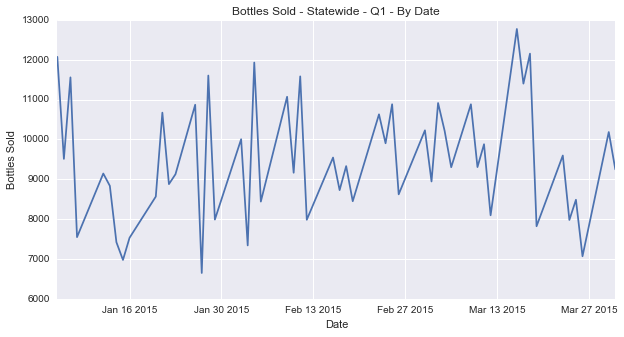

In [41]:
plt.figure(figsize=(10,5))
plt.xlabel('Date')
plt.ylabel('Bottles Sold')
plt.title('Bottles Sold - Statewide - Q1 - By Date')
plt.plot(yls_2015_q1_bs)
plt.show()

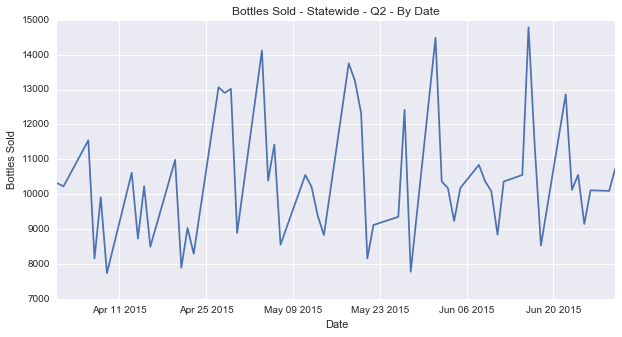

In [42]:
plt.figure(figsize=(10,5))
plt.xlabel('Date')
plt.ylabel('Bottles Sold')
plt.title('Bottles Sold - Statewide - Q2 - By Date')
plt.plot(yls_2015_q2_bs)

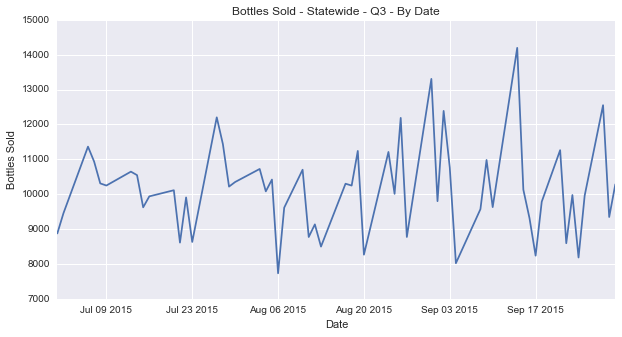

In [43]:
plt.figure(figsize=(10,5))
plt.xlabel('Date')
plt.ylabel('Bottles Sold')
plt.title('Bottles Sold - Statewide - Q3 - By Date')
plt.plot(yls_2015_q3_bs)
plt.show()

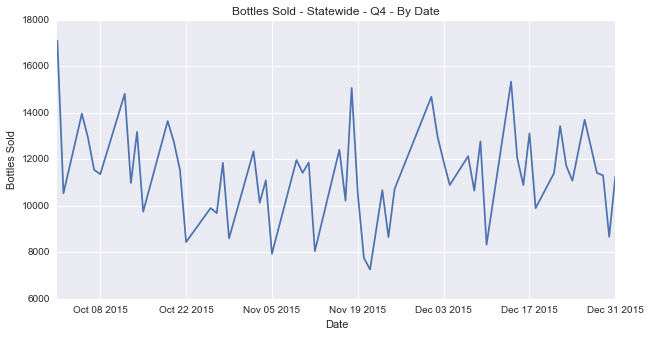

In [60]:
plt.figure(figsize=(10,5))
plt.xlabel('Date')
plt.ylabel('Bottles Sold')
plt.title('Bottles Sold - Statewide - Q4 - By Date')
plt.plot(yls_2015_q4_bs)
plt.show()

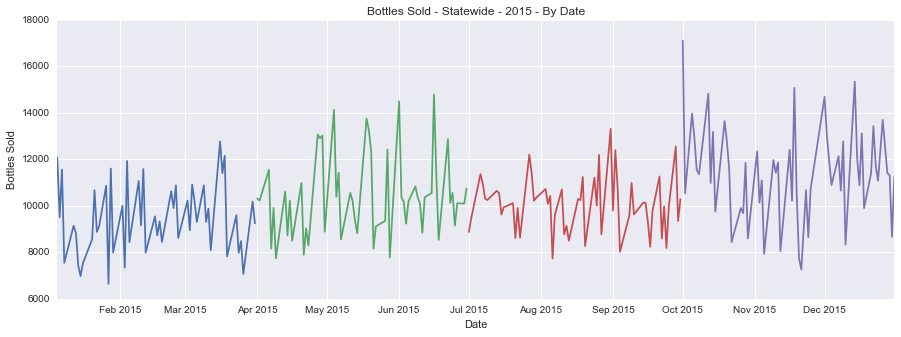

In [61]:
plt.figure(figsize=(15,5))
plt.xlabel('Date')
plt.ylabel('Bottles Sold')
plt.title('Bottles Sold - Statewide - 2015 - By Date')
plt.plot(yls_2015_q1_bs)
plt.plot(yls_2015_q2_bs)
plt.plot(yls_2015_q3_bs)
plt.plot(yls_2015_q4_bs)
plt.show()

In [77]:
# Expand the scope of the bottle counts to weekly counts.
# This is to help decrease the graph resolution so that 
# visualizations can be cleaned up compared to graphs at
# a resolution of daily sales.

yls_2015_q1_bs_weekly = yls_2015_q1_bs.resample('W').sum()
yls_2015_q2_bs_weekly = yls_2015_q2_bs.resample('W').sum()
yls_2015_q3_bs_weekly = yls_2015_q3_bs.resample('W').sum()
yls_2015_q4_bs_weekly = yls_2015_q4_bs.resample('W').sum()

In [361]:
yls_2015_q1_bs_weekly

date
2015-01-11    40682
2015-01-18    39902
2015-01-25    28139
2015-02-01    37106
2015-02-08    37710
2015-02-15    39795
2015-02-22    36048
2015-03-01    40032
2015-03-08    40297
2015-03-15    38158
2015-03-22    44140
2015-03-29    33125
2015-04-05    19431
Freq: W-SUN, Name: bottles_sold, dtype: int64

In [204]:
yls_q1pt = pd.pivot_table(yls_2015_q1,
               index=["countynumber","city","storenumber","date"],
               values=['bottles_sold','sale_in_dollars','vs_gal'])

#yls_q1pt.head(49)

In [78]:
yls_2015_q1_bs_weekly.index.min()

Timestamp('2015-01-11 00:00:00', offset='W-SUN')

[  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.]
[40682 39902 37239 37106 37710 39795 36048 40032 49596 38158 44140 33125
 19431]
Residual sum of squares: 130592508.86
Bias: -102820736.481
Variance: 233413245.335
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.685
Method:                 Least Squares   F-statistic:                     29.25
Date:                Wed, 21 Sep 2016   Prob (F-statistic):           0.000158
Time:                        00:42:41   Log-Likelihood:                -147.68
No. Observations:                  13   AIC:                             297.4
Df Residuals:                      12   BIC:                             297.9
Df Model:                           1                                         
Covariance Type:            nonrobust                     

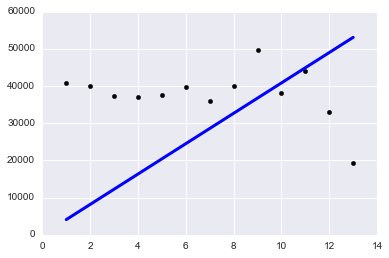

In [93]:
## ALSO, RUN OLS REGRESSIONS BY CREATING NUMPY ARRAYS OF TARGET DATA
from scipy import stats
# from sklearn import datasets, linear_model
import statsmodels.api as sm

def polynomials(X, degree=1):
    # See also numpy.vander
    array = [X]
    y = X
    for i in range(2, int(degree + 1)):
        y = y * X
        array.append(y)
    return np.array(array).transpose()

# Sample Regression
X_1 = ((yls_2015_q1_bs_weekly.index - yls_2015_q1_bs_weekly.index.min()) / np.timedelta64(1,'W'))+1

X_1_np = np.array(X_1)

#X = polynomials(X_1_np,1)
X = np.array(X_1_np).transpose()
Y = np.array(yls_2015_q1_bs_weekly)

regr = sm.OLS(Y,X).fit()

print X

print Y

# print Y

# The coefficients
yhat = regr.predict(X)
sse = np.mean((np.mean(yhat) - Y) ** 2)
var = np.var(yhat)
bias = sse - var - 0.01
print("Residual sum of squares: %.2f" % sse)
print("Bias: {bias}".format(bias=bias))
print("Variance: {var}".format(var=var))
print(regr.summary())
plt.scatter(X_1_np, Y,  color='black')
plt.plot(X_1_np, regr.predict(X), color='blue', linewidth=3)

# Try changing the X_1_np array so that the week number does not start at 1
print yhat

#plt.title()

plt.show()

[ 12.  13.  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.]
Residual sum of squares: 125522973.03
Bias: 50547881.4721
Variance: 74975091.5445
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     145.6
Date:                Wed, 21 Sep 2016   Prob (F-statistic):           1.96e-08
Time:                        00:37:36   Log-Likelihood:                -151.54
No. Observations:                  14   AIC:                             305.1
Df Residuals:                      13   BIC:                             305.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|  

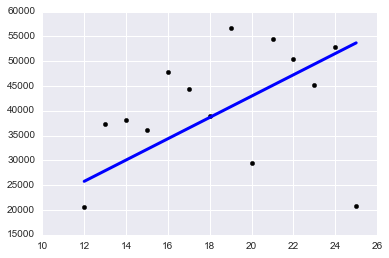

In [80]:
X_2 = (yls_2015_q2_bs_weekly.index - yls_2015_q1_bs_weekly.index.min()) / np.timedelta64(1,'W')

X_2_np = np.array(X_2)

print X_2_np

X = polynomials(X_2_np,1)
Y = np.array(yls_2015_q2_bs_weekly)

regr = sm.OLS(Y,X).fit()

# The coefficients
yhat = regr.predict(X)
sse = np.mean((np.mean(yhat) - Y) ** 2)
var = np.var(yhat)
bias = sse - var - 0.01
print("Residual sum of squares: %.2f" % sse)
print("Bias: {bias}".format(bias=bias))
print("Variance: {var}".format(var=var))
print(regr.summary())
plt.scatter(X_2_np, Y,  color='black')
plt.plot(X_2_np, regr.predict(X), color='blue', linewidth=3)

#plt.title()

plt.show()

Residual sum of squares: 76685908.46
Bias: 50590231.981
Variance: 26095676.468
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     272.7
Date:                Wed, 21 Sep 2016   Prob (F-statistic):           4.19e-10
Time:                        00:37:37   Log-Likelihood:                -147.00
No. Observations:                  14   AIC:                             296.0
Df Residuals:                      13   BIC:                             296.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------

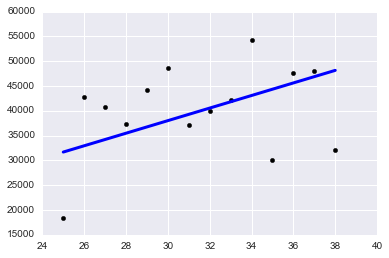

In [81]:
X_3 = (yls_2015_q3_bs_weekly.index - yls_2015_q1_bs_weekly.index.min()) / np.timedelta64(1,'W')

X_3_np = np.array(X_3)

X = polynomials(X_3_np,1)
Y = np.array(yls_2015_q3_bs_weekly)

regr = sm.OLS(Y,X).fit()

# The coefficients
yhat = regr.predict(X)
sse = np.mean((np.mean(yhat) - Y) ** 2)
var = np.var(yhat)
bias = sse - var - 0.01
print("Residual sum of squares: %.2f" % sse)
print("Bias: {bias}".format(bias=bias))
print("Variance: {var}".format(var=var))
print(regr.summary())
plt.scatter(X_3_np, Y,  color='black')
plt.plot(X_3_np, regr.predict(X), color='blue', linewidth=3)

#plt.title()

plt.show()

Residual sum of squares: 166846172.97
Bias: 151275925.401
Variance: 15570247.5611
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     155.3
Date:                Tue, 20 Sep 2016   Prob (F-statistic):           1.33e-08
Time:                        16:45:57   Log-Likelihood:                -152.11
No. Observations:                  14   AIC:                             306.2
Df Residuals:                      13   BIC:                             306.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------

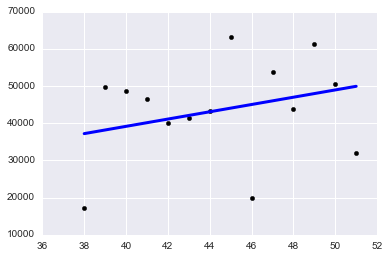

In [408]:
X_4 = (yls_2015_q4_bs_weekly.index - yls_2015_q1_bs_weekly.index.min()) / np.timedelta64(1,'W')

X_4_np = np.array(X_4)

X = polynomials(X_4_np,1)
Y = np.array(yls_2015_q4_bs_weekly)

regr = sm.OLS(Y,X).fit()

# The coefficients
yhat = regr.predict(X)
sse = np.mean((np.mean(yhat) - Y) ** 2)
var = np.var(yhat)
bias = sse - var - 0.01
print("Residual sum of squares: %.2f" % sse)
print("Bias: {bias}".format(bias=bias))
print("Variance: {var}".format(var=var))
print(regr.summary())
plt.scatter(X_4_np, Y,  color='black')
plt.plot(X_4_np, regr.predict(X), color='blue', linewidth=3)

#plt.title()

plt.show()

In [82]:

model = sm.OLS(Y, X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     272.7
Date:                Wed, 21 Sep 2016   Prob (F-statistic):           4.19e-10
Time:                        00:37:40   Log-Likelihood:                -147.00
No. Observations:                  14   AIC:                             296.0
Df Residuals:                      13   BIC:                             296.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1          1267.2363     76.737     16.514      0.000      1101.455  1433.017
==============================================================================
Omnibus:                        1.666   Durbin-Watson:                   1.939
Prob(Omnibus):                  0.435   Jarque-Bera (JB):                1.305
Skew:                          -0.648   Prob(JB):                        0.521
Kurtosis:                       2.253   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [323]:
# Question 2 - Linear Model to predict yearly sales
# Sales from Jan-Mar provided as a required variable
# Assumption based on requirement is that forecasts are to be based on quarterly sales figures
import numpy as np
import matplotlib.dates as dates

def calculate_yhat(x, b0, b1):
    return b0 + b1*x

def calculate_b0(x):
    x_i = (x.index - x.index.min()) / np.timedelta64(1,'W')
    y_i = x
    n1 = len(X1)
    return ( sum(x_i * y_i) * sum(x_i) - sum(y_i) * sum(x_i**2) ) / ( (sum(x_i)**2) - n1 * sum(x_i**2))

def calculate_b1(x):
    x_i = (x.index - x.index.min()) / np.timedelta64(1,'W')
    y_i = x
    n1 = len(X1)    
    return ( sum(x_i)*sum(y_i) - n1 * sum(x_i*y_i) ) / ( sum(x_i)**2 - n1 * sum(x_i**2) )

X1 = (yls_2015_q1_bs_weekly.index - yls_2015_q1_bs_weekly.index.min()) / np.timedelta64(1,'W')
X2 = (yls_2015_q2_bs_weekly.index - yls_2015_q2_bs_weekly.index.min()) / np.timedelta64(1,'W')
X3 = (yls_2015_q3_bs_weekly.index - yls_2015_q3_bs_weekly.index.min()) / np.timedelta64(1,'W')
X4 = (yls_2015_q4_bs_weekly.index - yls_2015_q4_bs_weekly.index.min()) / np.timedelta64(1,'W')

In [313]:
def plot_regression(x, y, b0, b1):
    
    fig = plt.figure(figsize=(10,10))
    ax = fig.gca()
    
    yhat = calculate_yhat(x, b0, b1)
    
    ax.scatter(x, y, color='steelblue', s=10)
    ax.scatter(x, yhat, color='darkred', s=10, alpha=0.3)

    ax.plot(x, yhat, color='darkred', linewidth=1.5, alpha=0.7)
    
    plt.show()
    
def calculate_residuals(y, yhat):
    return y - yhat

def sum_sq_errors(errors):
    return np.sum(errors**2)

In [413]:
#print calculate_b0(yls_2015_q1_bs_weekly), calculate_b1(yls_2015_q1_bs_weekly)
#print calculate_b0(yls_2015_q2_bs_weekly), calculate_b1(yls_2015_q2_bs_weekly)
#print calculate_b0(yls_2015_q3_bs_weekly), calculate_b1(yls_2015_q3_bs_weekly)
#print calculate_b0(yls_2015_q4_bs_weekly), calculate_b1(yls_2015_q4_bs_weekly)

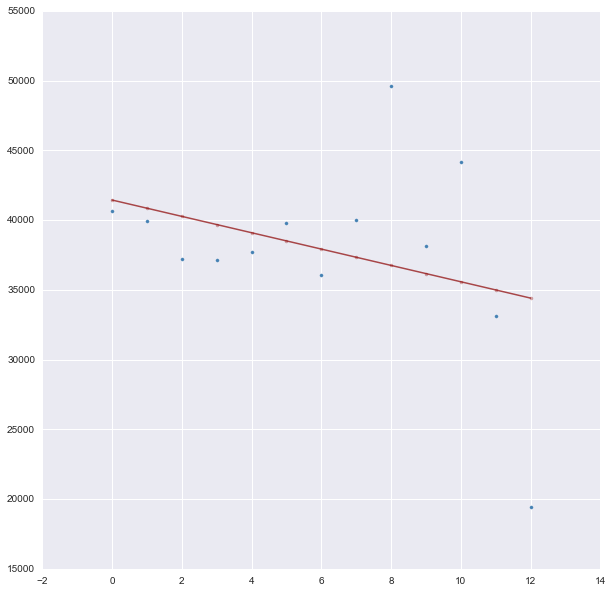

In [470]:
plot_regression(X1, yls_2015_q1_bs_weekly, calculate_b0(yls_2015_q1_bs_weekly), calculate_b1(yls_2015_q1_bs_weekly))

In [411]:
#plot_regression(X2, yls_2015_q2_bs_weekly, calculate_b0(yls_2015_q2_bs_weekly), calculate_b1(yls_2015_q2_bs_weekly))

In [410]:
#plot_regression(X3, yls_2015_q3_bs_weekly, calculate_b0(yls_2015_q3_bs_weekly), calculate_b1(yls_2015_q3_bs_weekly))

In [409]:
#plot_regression(X4, yls_2015_q4_bs_weekly, calculate_b0(yls_2015_q4_bs_weekly), calculate_b1(yls_2015_q4_bs_weekly))

In [414]:
#sales_hat = calculate_yhat(yls_2015_q1_bs_weekly,calculate_b0(yls_2015_q1_bs_weekly),calculate_b1(yls_2015_q1_bs_weekly))
#print sales_hat[0:5]
#resids = calculate_residuals(yls_2015_q1_bs_weekly, sales_hat)
#print resids
#sq_resids = sum_sq_errors(resids)
#print sq_resids

In [ ]:
# Question 3 - User model for 2015 to estimate total sales for stores in 2016

## Record your findings

Be sure to write out anything observations from your exploratory analysis.

# Mine the data
Now you are ready to compute the variables you will use for your regression from the data. For example, you may want to
compute total sales per store from Jan to March of 2015, mean price per bottle, etc. Refer to the readme for more ideas appropriate to your scenario.

Pandas is your friend for this task. Take a look at the operations [here](http://pandas.pydata.org/pandas-docs/stable/groupby.html) for ideas on how to make the best use of pandas and feel free to search for blog and Stack Overflow posts to help you group data by certain variables and compute sums, means, etc. You may find it useful to create a new data frame to house this summary data.

# Refine the data
Look for any statistical relationships, correlations, or other relevant properties of the dataset.

# Build your models

Using scikit-learn or statsmodels, build the necessary models for your scenario. Evaluate model fit.

In [ ]:
from sklearn import linear_model


## Plot your results

Again make sure that you record any valuable information. For example, in the tax scenario, did you find the sales from the first three months of the year to be a good predictor of the total sales for the year? Plot the predictions versus the true values and discuss the successes and limitations of your models

# Present the Results

Present your conclusions and results. If you have more than one interesting model feel free to include more than one along with a discussion. Use your work in this notebook to prepare your write-up.